In [2]:
import pprint
import re
from pdf2image import convert_from_path
from pytesseract import image_to_string


In [103]:
#helper func 
def convert_pdf_to_img(pdf_file):
    return convert_from_path(pdf_file)


def convert_image_to_text(file):
    #default config 
    cfg  = "--psm 4"
    text = image_to_string(file, config = cfg, lang='fra')
    return text


def get_text_from_any_pdf(pdf_file):
    images = convert_pdf_to_img(pdf_file)
    final_output = {}
    for pg, img in enumerate(images):
        final_output[pg]=convert_image_to_text(img)
    return final_output

def text_preprocess(txt):
    txt = txt.replace('\n\n', '\n').split('\n')
    #print(txt)
    return txt

def get_idx_with_2_targets(texts, target_1, target_2): #return idx of line when founding target word 
    return [idx for idx in range(len(texts)) if  target_1 in texts[idx] and target_2 in texts[idx]][0]
def get_idx_with_1_targets(texts, target):
    return [idx for idx in range(len(texts)) if  target in texts[idx]][0]


In [104]:
#extract from page 1
def extract_page_1(utf8_txt):
    #returns {
    # {'facure_date': 'Facture du 16/12/2020', 
    # 'facure_number': 'n° 10121328333', 
    # 'facure_TTC': 'Facture TTC 882,25 €'}
    # }
    data={}
    utf8_txt = text_preprocess(utf8_txt)
    #extracting date 
    try:
        idx_NAME = get_idx_with_2_targets(utf8_txt, "ceriié", "authentique")
        champ_de_text = utf8_txt[idx_NAME +1]
        NAME  = champ_de_text[:]
        data['NAME_ENTREPRISE' ]= NAME 
    except Exception as e:
        data['NAME_ENTREPRISE' ]= "None"

    try:
        idx_facture_date = get_idx_with_2_targets(utf8_txt, "Facture", "du")
        champ_de_text = utf8_txt[idx_facture_date]
        # print(champ_de_text)
        # print(type(champ_de_text))
        x=str(''.join(list(filter(str.isdigit, champ_de_text ))))
        date =str(x[4:8]+'-'+x[2:4]+'-'+x[0:2])
        data['facure_date' ]= date 
    except Exception as e:
        data['facure_date' ]= "None"
    #extracting facture number 
    try:
        idx_facture_num = get_idx_with_1_targets(utf8_txt, "n°")
        champ_de_text = utf8_txt[idx_facture_num]
        # print(champ_de_text)
        # print(type(champ_de_text))
        number  = 'n° ' + str(int(re.search(r'\d+', champ_de_text[:]).group()) )
        data['facure_number' ]= number 
        print('*', data)
    except Exception as e:
        print(e)
        data['facure_number' ]= "None"

    #extracting TTC montant 
    try:
        idx_facture_TTC = get_idx_with_2_targets(utf8_txt, "Facture", "TTC")
        champ_de_text = utf8_txt[idx_facture_TTC]
        # print(champ_de_text)
        # print(type(champ_de_text))
        TTC  = champ_de_text[:]
        data['facure_TTC' ]= TTC 
        print('*', data)
    except Exception as e:
        data['facure_TTC' ]= "None"



    return data 
    #extract from page 2 

def extract_page_2(utf8_txt):
    #returns: {
    # {'NAME_ENTREPRISE': 'ETS MARQUET', 
    # 'ACHeminement': '30001790300200', 
    # 'echeance': ' 3001/2021'}
    # }
    data={}
    utf8_txt = text_preprocess(utf8_txt)
    print("step 1")

    #extracting nom sosiete  
    try:

        idx_NAME = get_idx_with_2_targets(utf8_txt, "ETS", "MARQUET")
        champ_de_text = utf8_txt[idx_NAME]
        NAME  = champ_de_text[:]
        data['NAME_ENTREPRISE' ]= NAME 
    except Exception as e:
        print("step 2")

        data['NAME_ENTREPRISE' ]= "None"

    try:

        idx_ACHeminement = get_idx_with_1_targets(utf8_txt, "Acheminement")
        champ_de_text = utf8_txt[idx_ACHeminement]
        ACHeminement  = champ_de_text[-14:]
        data['ACHeminement' ]= ACHeminement 
    except Exception as e:
        print("step 3")

        data['ACHeminement' ]= "None"


    # #extracting echeance  
    try:

        idx_echeance = get_idx_with_2_targets(utf8_txt, "échéance" , "le")
        print("*********aaaaaaaaaaaaaa", idx_echeance)

        champ_de_text = utf8_txt[idx_echeance]
        print("*********aaaaaaaaaaaaaa")
        print(champ_de_text)
        x=str(''.join(list(filter(str.isdigit, champ_de_text ))))
        date =str(x[4:8]+'-'+x[2:4]+'-'+x[0:2])
        data['echeance' ]= date 
        print(data)

    except Exception as e:
        print("step 4")
        print(e)
        data['echeance' ]= "None"

    return data 


In [14]:
!tree

.
├── data
│   ├── original_pdf
│   │   └── 4141_001.pdf
│   └── saved
└── img_test.ipynb

3 directories, 2 files


'/home/amenallah/Desktop/CEREBRA_PROJECTS-AWS/EDF/back_end/extractify/tests'

In [105]:
#Store Pdf with convert_from_path function
path = "data/saved/"
images = convert_from_path('./data/original_pdf/4141_001.pdf')
for i in range(len(images)):
    # Save pages as images in the pdf
    images[i].save(path + 'page'+ str(i) +'.jpg', 'JPEG')

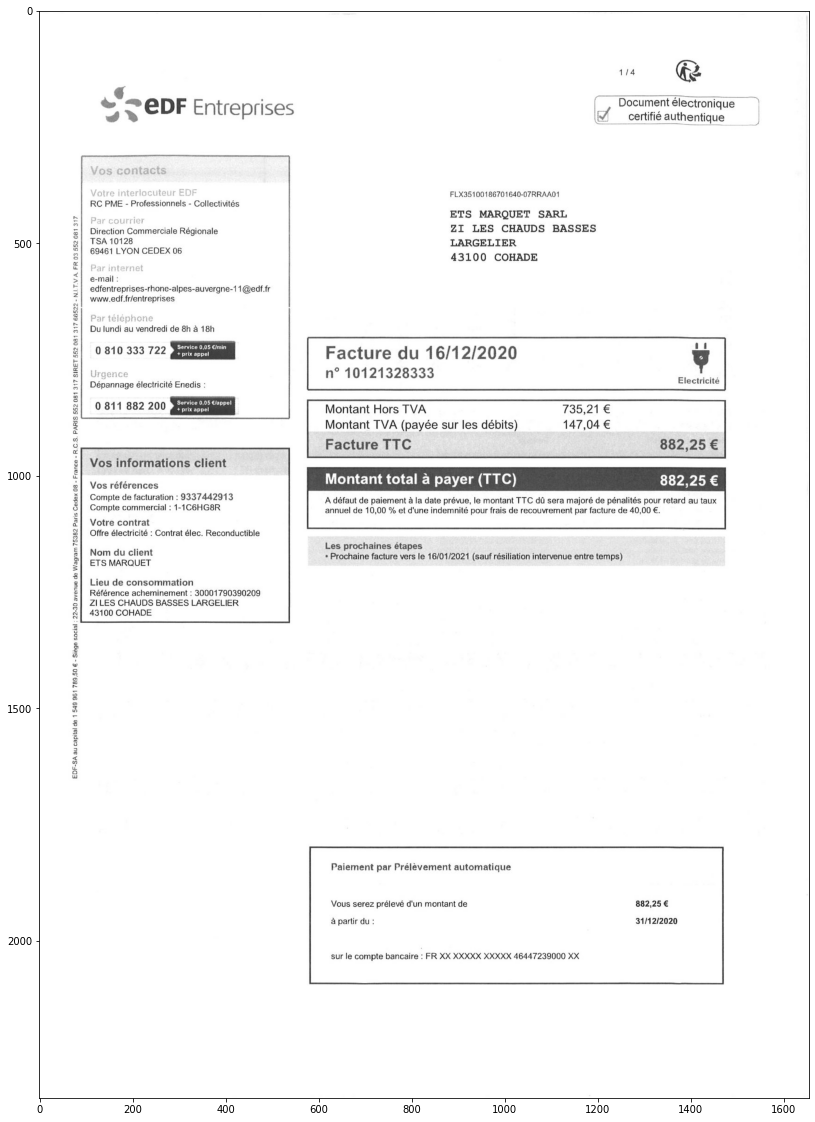

In [106]:
import cv2
from matplotlib import pyplot as plt

def show(image):
    plt.figure(figsize=(20,20))
    image= cv2.imread(image)

    plt.imshow(image)
    plt.show()    
page_1 = 'data/saved/page0.jpg'
show(page_1)

In [107]:
convert_image_to_text(page_1)

"€\n©, PEDF Entreprises\n\nRC PME - Professionnels - Collectivités\n\nDirection Commerciale Régionale\nTSA 10128\n69461 LYON CEDEX 06\n\ne-mail :\nedfentreprises-rhone-alpes-auvergne-1 1@edf.fr\nwww.edf.fr/entreprises\n\nDu lundi au vendredi de 8h a 18h\n\n0 810 333 722\n\nUrgence\n\nDépannage électricité Enedis :\n\n0 811 882 200\n\nVos informations client\n\nVos références\nCompte de facturation : 9337442913\nCompte commercial : 1-1C6HG8R\n\nVotre contrat\nOffre électricité : Contrat élec. Reconductible\n\nNom du client\nETS MARQUET\n\nLieu de consommation\n\nRéférence acheminement : 30001790390209\nZILES CHAUDS BASSES LARGELIER\n43100 COHADE\n\n \n\n \n\n114 @\n\nFLX35100186701640-07RRAAO1\n\nETS MARQUET SARL\n\nZI LES CHAUDS BASSES\nLARGELIER\n\n43100 COHADE\n\nFacture du 16/12/2020\nn° 10121328333\n\nElectricité\n\nMontant Hors TVA\nMontant TVA (payée sur les débits)\n\nFacture TTC 882,25 €\n\nMontant total a payer (TTC) 882,25 €\n\nA défaut de paiement a la date prévue, le montan

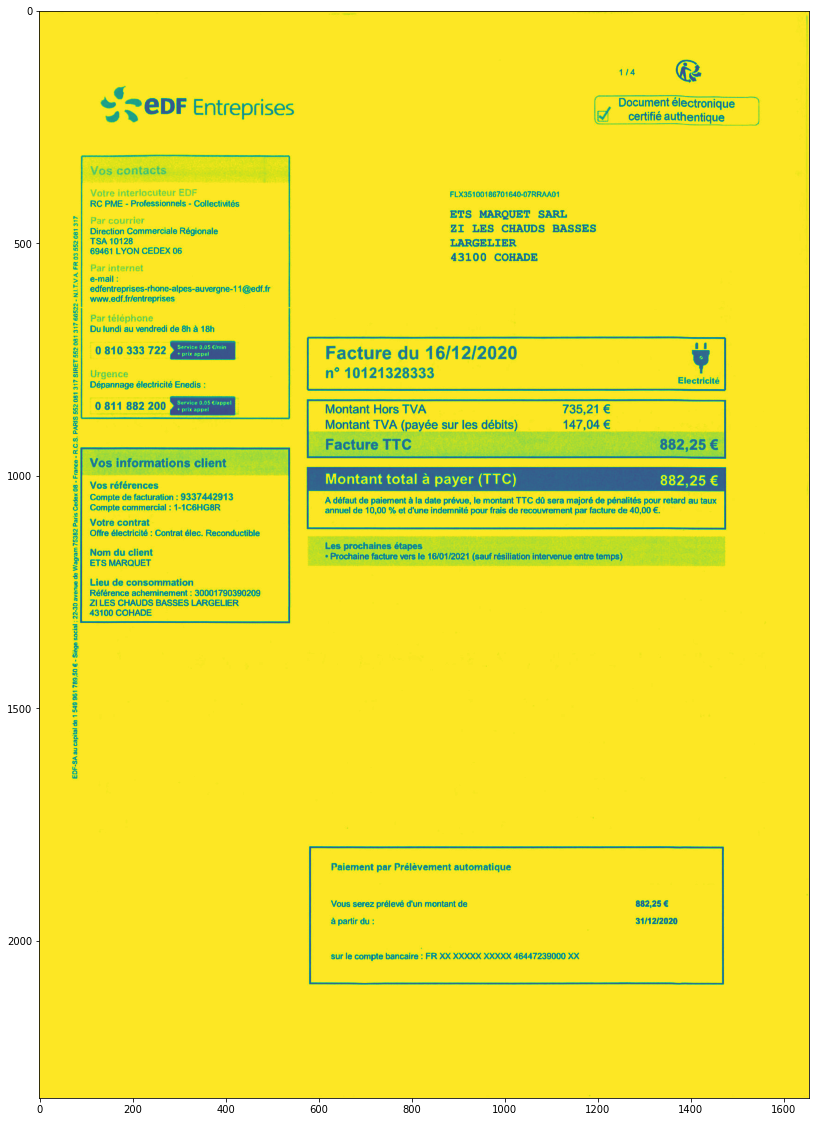

In [71]:
def to_gray(image_arr):
    return cv2.cvtColor(image_arr, cv2.COLOR_BGR2GRAY)
IMAGE = to_gray(cv2.imread(page_1))
plt.figure(figsize=(20,20))
plt.imshow(IMAGE)

In [72]:
convert_image_to_text(IMAGE)

"EDF-SA au capital de 1549 961 789,50 € - Siage social : 22-30 avenue de Wagram 75382 Paris Cedex 08 - France - R.C.S. PARIS 552 081 317 SIRET 552 081 317 66522 - NILT.VA. FR 03 552081 317\n\n \n\n€\n©, PEDF Entreprises\n\nRC PME - Professionnels - Collectivités\n\nDirection Commerciale Régionale\nTSA 10128\n69461 LYON CEDEX 06\n\ne-mail :\nedfentreprises-rhone-alpes-auvergne-1 1@edf.fr\nwww.edf.fr/entreprises\n\nDu lundi au vendredi de 8h a 18h\n\n0 810 333 722\n\nUrgence\n\nDépannage électricité Enedis :\n\n0 811 882 200\n\nVos informations client\n\nVos références\nCompte de facturation : 9337442913\nCompte commercial : 1-1C6HG8R\n\nVotre contrat\nOffre électricité : Contrat élec. Reconductible\n\nNom du client\nETS MARQUET\n\nLieu de consommation\n\nRéférence acheminement : 30001790390209\nZILES CHAUDS BASSES LARGELIER\n43100 COHADE\n\nFLX35100186701640-07RRAAO1\n\nETS MARQUET SARL\n\n114 @\n\n~~ Document électronique\n(2 certifiéauthentique\n\nZI LES CHAUDS BASSES\n\nLARGELIER\n43

In [82]:
pwd

'/home/amenallah/Desktop/CEREBRA_PROJECTS-AWS/EDF/back_end/extractify/tests'

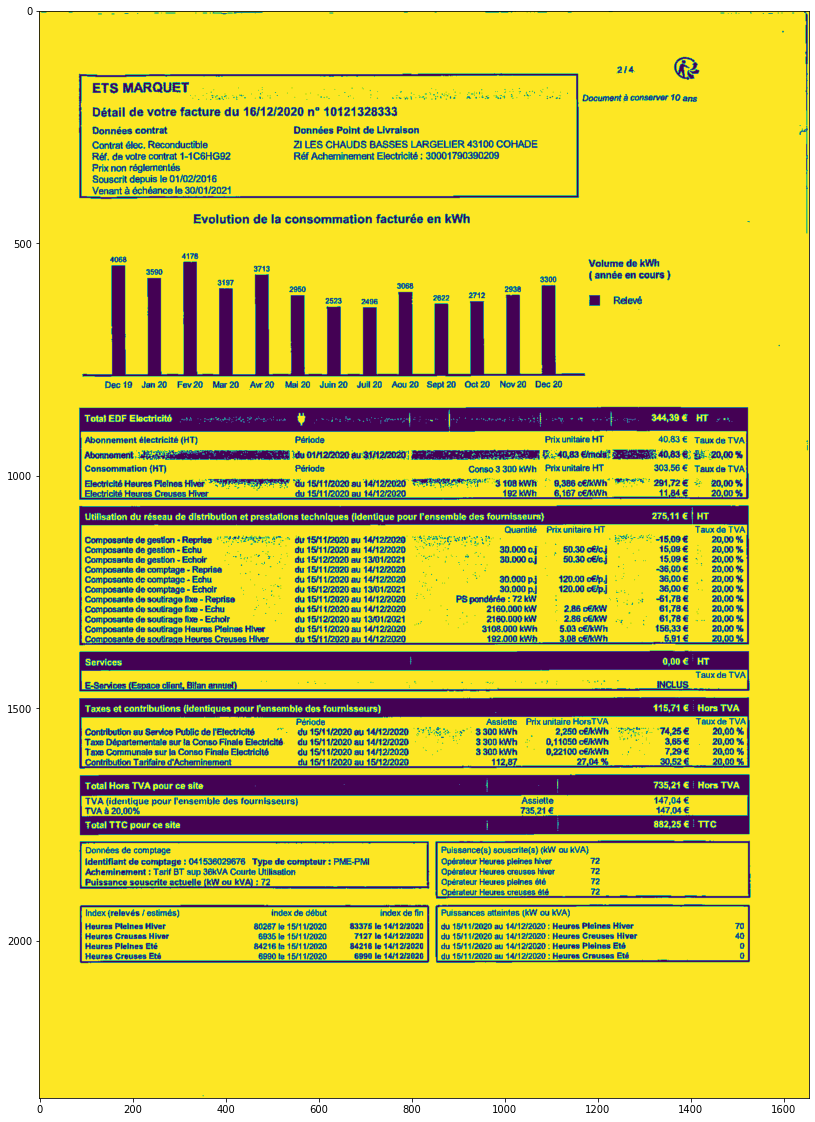

In [102]:
def to_ADAPTIVE_THRESHHOLD(image_path):
    image_arr = cv2.imread(image_path)
    #image to rgb channels 
    image_arr = cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB)
    #image to gray 
    image_arr = cv2.cvtColor(image_arr, cv2.COLOR_RGB2GRAY)
    return cv2.adaptiveThreshold(
        image_arr,255,
        cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY,
        97,11
    )
IMAGE = to_ADAPTIVE_THRESHHOLD("data/saved/page1.jpg")
plt.figure(figsize=(20,20))
plt.imshow(IMAGE)

In [94]:
convert_image_to_text(IMAGE)

'214 @\n\npe ee AR Me ES ae Document a conserver 10 ans\n\nETS MARQUET\n\nDétail de votre facture du 16/12/2020 n° 10421328333\n\nDonnées contrat Données Point de Livraison\n\nCantrat élec. Reconductible ZI LES CHAUDS BASSES LARGELIER 43100 COHADE\nRéf. de votre contrat 1-1C6HG92 Réf Acheminement Electricité : 30001790390209\n\nPrix non réglernentés\n\nSouscrit depuis le 01/02/2016\n\nVenant a échéance le 30/01/2021\n\n \n\nEvolution de la consommation facturée en kWh\n\n4068 4178\n\nVolume de kWh\n( année en cours )\n\n   \n\n   \n\n2523\n\n2496 WE Relevée\n\nDeci9 Jan20 Fev20 Mar20 Avw20 Mai20 Juin20 Juil20 Acu20 Sept20 Oct20 Nov20 Dec 20\n\nBt eae re Pets 7 Rows c 5 ee Ag r ak Me te\n\nAbonnement électricité (HT) Période Prix unitaire HT 40,83 € Tauxde TVA!\n\naa WAGES \'du 0142/2020 4u\'31/12/2020| RD aa BOR, 40,83 Chmolt SIRERBG 40,83 €; 5¥ 20,00 %\nConsommation (HT) Période Conso 3300 kWh = Prix unitaire HT 303,56 € Tauxde TVA\n\nElectricité Heures PleInes Hiver’ “FSS FF Re Qu 15